# Gonorrhea Simple

In [1]:
import aux
import model
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
warnings.filterwarnings("ignore",category=DeprecationWarning)
plt.rcParams['figure.figsize'] = [12, 5]

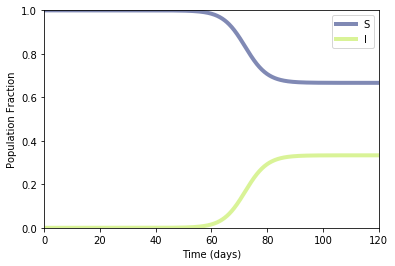

In [68]:
# User inputs
(N, tmax) = (200000000, 10 * 12)
(beta, partRate, duration) = (.75, 1, 2)
(iInit) = (1)
# Internals
(sInit, rec) = (N - iInit, 1 / duration)
t = np.linspace(0, tmax, tmax * 10)
y0 = (sInit, iInit)
# Run
ret = odeint(model.dGonorrhea, y0, t, args=(N, beta, partRate, rec))
(S, I) = ret.T / N
# Plot
tp = ((S, '#02146b', 'S'), (I, '#b4e830', 'I'))
(fig, ax) = aux.plotEpiDynamicsPop(tp, t, tmax, 1)